# FINM 250 - TA Review 4 - Predictive Regressions
## Tobias Rodriguez del Pozo

**Note** Most of the material in this review is going over HW3 and HW4, the solutions to which can be found in the solutions folder of the GitHub repo.

## 1. Midterm Tips

- **Understand the Homework**: The goal of the midterm is not to trick you, or ask you questions you have no idea how to answer. Instead, the midterm is solely based on your understanding of the material seen in the homework and in class. So, really make sure you understand what (a) my code is doing, (b) what the homework questions are asking, and (c) what the content we have covered in class is about.
- **Make a Template**: I strongly suggest making a midterm Jupyter Notebook template. This template should already have your name, any helper functions you'll need, and any imports you'll need. This will save you valuable time when it comes time to take the midterm, since you won't need to worry at all about your coding environment.
- **Answer What is Asked**: For a lot of the conceptual questions, you can achieve full-marks on them in 1-2 succint sentences. Really try to answer the question: if it's a True/False question, say either True or False, not "both". You don't need to write paragraphs for these questions.
- **Low-Hanging Fruit**: In contrast to some exams you might have taken before, the midterm does not necessarily get harder the further you progress into it. Therefore, you should aim to answer as many questions as possible, even if they are not in order. If you're stuck on a question, quickly move on to the next one and come back to it later. Don't think that because you're stuck on Q1, then Q3 will be even harder.

## 2. Regression Recap:

$$
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon
$$

## 3. Predictive Regressions

Idea:

$$
y_{t+1} = \beta_0 + \beta_1 X_{1,t} + \beta_2 X_{2,t} + ... + \beta_p X_{p,t} + \epsilon_{t+1}
$$

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# This is a new trick that we can use to import modules from other directories.
import sys

# We append it to "path" meaning that Python will look in this directory when we try to import modules.
# Note that ".." means go up one directory, and then we go into the "cmds" directory.
sys.path.append("../cmds")
from utils import calc_iterative_regression, plot_capm_regression

# Auto reload modules.
%load_ext autoreload
%autoreload 2

# Plotting settings.
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.style.use("ggplot")

pd.set_option("display.float_format", lambda x: "{:.4f}".format(x))

ADJ = 12
returns = pd.read_excel(
    "../data/gmo_analysis_data.xlsx",
    sheet_name="returns (total)",
    index_col=0,
    parse_dates=[0],
)

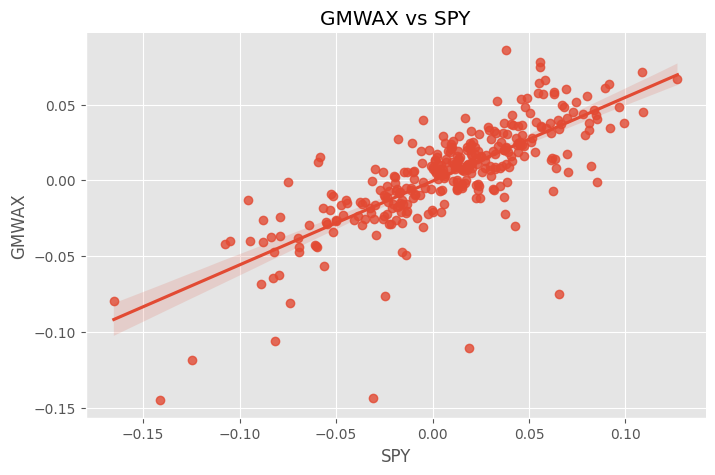

In [2]:
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.regplot(
    x=returns["SPY"],
    y=returns["GMWAX"],
)
ax.set_title("GMWAX vs SPY");

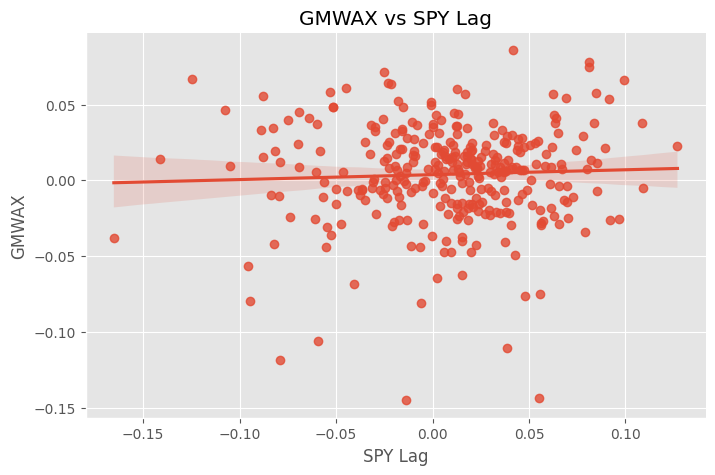

In [3]:
# Lag SPY by 1 month.
fig, ax = plt.subplots(figsize=(8, 5))
returns["SPY Lag"] = returns["SPY"].shift(1)

ax = sns.regplot(
    x=returns["SPY Lag"],
    y=returns["GMWAX"],
)
ax.set_title("GMWAX vs SPY Lag");

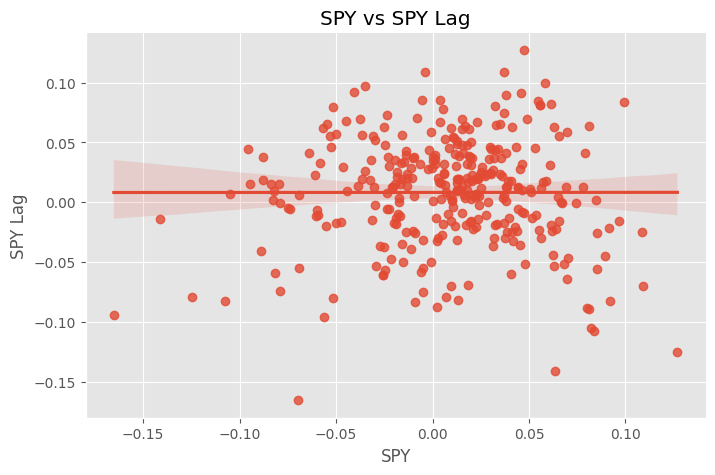

In [4]:
# Compare spy with spy lag.
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.regplot(
    x=returns["SPY"],
    y=returns["SPY Lag"],
)

ax.set_title("SPY vs SPY Lag");

In [5]:
# Calculate the regression of GMWAX on SPY.
X = sm.add_constant(returns["SPY"])
y = returns["GMWAX"]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GMWAX   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     457.5
Date:                Thu, 04 Jul 2024   Prob (F-statistic):           6.52e-64
Time:                        13:01:49   Log-Likelihood:                 797.92
No. Observations:                 326   AIC:                            -1592.
Df Residuals:                     324   BIC:                            -1584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.001     -0.410      0.682      -0.003       0.002
SPY            0.5527      0.026     21.390      0.000       0.502       0.603
==============================================================================
Omnibus:                      158.766   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1352.794
Skew:                          -1.819   Prob(JB):                    1.76e-294
Kurtosis:                      12.292   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Looks pretty good -- what happens if we lag SPY?
X = sm.add_constant(returns["SPY Lag"])
model = sm.OLS(y, X, missing="drop").fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GMWAX   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6493
Date:                Thu, 04 Jul 2024   Prob (F-statistic):              0.421
Time:                        13:01:49   Log-Likelihood:                 653.02
No. Observations:                 325   AIC:                            -1302.
Df Residuals:                     323   BIC:                            -1294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0038      0.002      2.052      0.041       0.000       0.007
SPY Lag        0.0323      0.040      0.806      0.421      -0.047       0.111
==============================================================================
Omnibus:                       68.723   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.022
Skew:                          -0.983   Prob(JB):                     1.81e-40
Kurtosis:                       6.107   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

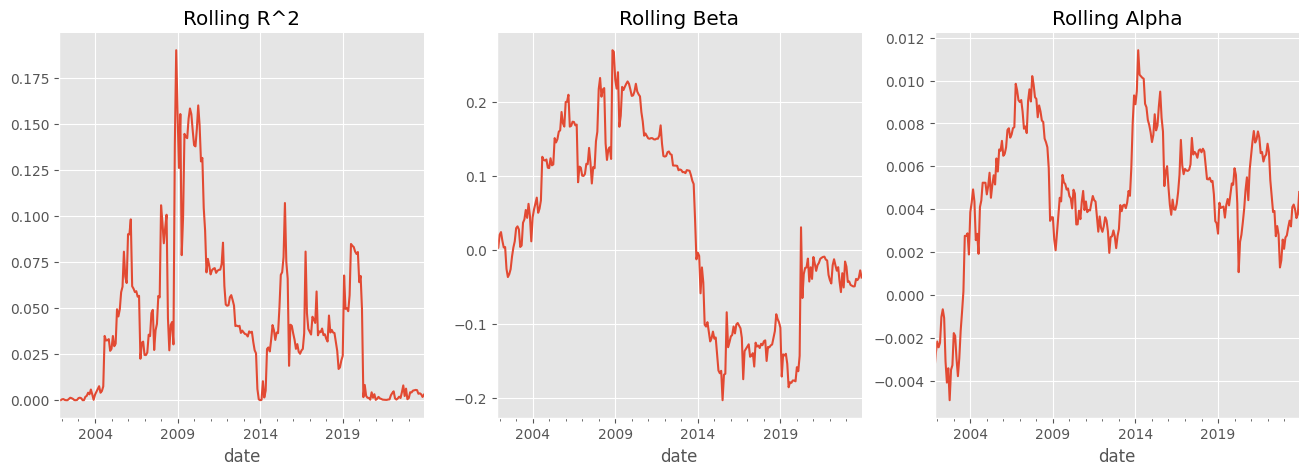

In [7]:
# Pretty bad!
# What happens if we run a rolling regression and calculate the rolling R^2, beta, and alpha?
# We will use a 60-month window.
from collections import defaultdict

summary = defaultdict(list)

for i in range(60, len(returns)):
    X = sm.add_constant(returns["SPY Lag"].iloc[i - 60 : i])
    y = returns["GMWAX"].iloc[i - 60 : i]
    model = sm.OLS(y, X, missing="drop").fit()
    summary["R^2"].append(model.rsquared)
    summary["Beta"].append(model.params[1])
    summary["Alpha"].append(model.params[0])
    
    # And now calculate the predicted returns
    summary["Predicted Returns"].append(model.predict(X).iloc[-1])
    
    # And the actual returns
    summary["Actual Returns"].append(y.iloc[-1])
    
summary = pd.DataFrame(summary, index=returns.index[60:])

# Make 1x3 plot of rolling R^2, beta, and alpha.
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

summary["R^2"].plot(ax=ax[0], title="Rolling R^2")
summary["Beta"].plot(ax=ax[1], title="Rolling Beta")
summary["Alpha"].plot(ax=ax[2], title="Rolling Alpha");